# GPT-NEO-1.3B

## GPTNeoForCausalLM

### (transformer): GPTNeoModel(
- **(wte)**: `Embedding(50257, 2048)`
- **(wpe)**: `Embedding(2048, 2048)`
- **(h)**: `ModuleList`(
  - **(0-23)**: GPTNeoBlock(
    - **(ln_1)**: `LayerNorm((2048,), eps=1e-05, elementwise_affine=True)`
    - **(attn)**: `GPTNeoSelfAttention`
      - `attn_dropout`: `Dropout(p=0.0, inplace=False)`
      - `resid_dropout`: `Dropout(p=0.0, inplace=False)`
      - `q_proj`: `Linear(in_features=2048, out_features=2048, bias=True)`
      - `k_proj`: `Linear(in_features=2048, out_features=2048, bias=True)`
      - `v_proj`: `Linear(in_features=2048, out_features=2048, bias=True)`
      - `out_proj`: `Linear(in_features=2048, out_features=2048, bias=True)`
    - **(mlp)**: `GPTNeoMLP`
      - `c_fc`: `Linear(in_features=2048, out_features=8192, bias=True)`
      - `c_proj`: `Linear(in_features=8192, out_features=2048, bias=True)`
      - `dropout`: `Dropout(p=0.0, inplace=False)`
    - **(ln_2)**: `LayerNorm((2048,), eps=1e-05, elementwise_affine=True)`)

- **(ln_f)**: `LayerNorm((2048,), eps=1e-05, elementwise_affine=True)`)

### (lm_head): `Linear(in_features=2048, out_features=50257, bias=False)`)


## GPT-NEO-1.3B Evaluation using WikiText-2 and PTB (Perplexity)

To evaluate the language modeling performance of **GPT-Neo-1.3B**, we report **perplexity** on two standard datasets: **Penn Treebank (PTB)** and **WikiText-2**.
Perplexity measures how well a model predicts the next token in a sequence — lower values indicate better performance.

### Penn Treebank (PTB)

- Contains ~1 million tokens derived from Wall Street Journal articles.
- Lowercased text
- No punctuation or special characters
- Limited vocabulary (~10,000 unique words)

### WikiText-2

- Contains ~2 million tokens sourced from Wikipedia articles.
- Designed to reflect more natural and realistic language patterns.
- Preserves original casing, punctuation, and numbers
- Supporting evaluation of long-range dependencies


Activation Word Length 6
 Weight Word Length  Activation Word Length  Wiki Perplexity  PTB Perplexity  Compression Ratio
                  4                       6       576.682410      370.702918           8.000000
                  6                       6       138.527901      108.334491           5.333333
                  8                       6       108.510374       89.694753           4.000000
                 10                       6       115.618075       92.209671           3.200000
                 12                       6       115.666214       91.934748           2.666667
                 14                       6       114.410769       92.198240           2.285714
                 16                       6       113.927505       92.516027           2.000000
Activation Word Length 8
 Weight Word Length  Activation Word Length  Wiki Perplexity  PTB Perplexity  Compression Ratio
                  4                       8       306.009055      225.950669          

/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_47450/2187353707.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("Blues")
/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_47450/2187353707.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 0.05, 1])  # Leave space on the right


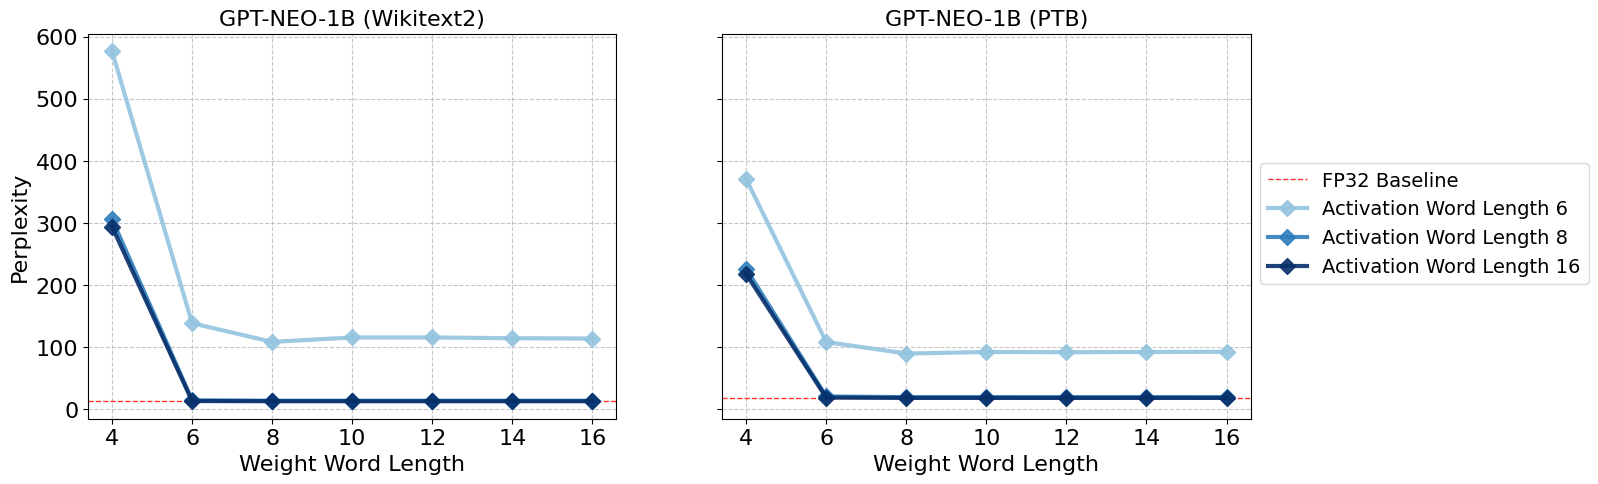

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

# Load data
quant_result = pd.read_csv('gpt_quantization.csv')

# Prepare colors
colormap = get_cmap("Blues")
colors = colormap(np.linspace(0.4, 1, 3))
act_wls = [6, 8, 16]

# Font size
label_font_size = 16
tick_font_size = 16

# Perplexity baselines
baseline_wiki_perplexity = 12.925852477582438
baseline_ptb_perplexity = 18.231172715396134

# Create figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# === Subplot 1: Wiki ===
ax1.set_title('GPT-NEO-1B (Wikitext2)', fontsize=label_font_size)
ax1.set_xlabel('Weight Word Length', fontsize=label_font_size)
ax1.set_ylabel('Perplexity', fontsize=label_font_size)
ax1.tick_params(axis='both', which='major', labelsize=tick_font_size)
ax1.axhline(baseline_wiki_perplexity, color='red', linestyle='--', linewidth=1, alpha=0.8, label='FP32 Baseline')

for i, act_wl in enumerate(act_wls):
    ax1.plot(
        quant_result[quant_result["Activation Word Length"] == act_wl]["Weight Word Length"],
        quant_result[quant_result["Activation Word Length"] == act_wl]["Wiki Perplexity"],
        linewidth=3,
        alpha=0.9,
        markersize=8,
        label=f'Activation Word Length {act_wl}',
        color=colors[i], marker='D', linestyle='-'
    )

ax1.grid(linestyle='--', alpha=0.7)

# === Subplot 2: PTB ===
ax2.set_title('GPT-NEO-1B (PTB)', fontsize=label_font_size)
ax2.set_xlabel('Weight Word Length', fontsize=label_font_size)
ax2.tick_params(axis='both', which='major', labelsize=tick_font_size)
ax2.axhline(baseline_ptb_perplexity, color='red', linestyle='--', linewidth=1, alpha=0.8)

for i, act_wl in enumerate(act_wls):
    print(f"Activation Word Length {act_wl}")
    # print(quant_result[quant_result["Activation Word Length"] == act_wl])
    print(quant_result[quant_result["Activation Word Length"] == act_wl].to_string(index=False))
    print(f"================================================================================================")
    ax2.plot(
        quant_result[quant_result["Activation Word Length"] == act_wl]["Weight Word Length"],
        quant_result[quant_result["Activation Word Length"] == act_wl]["PTB Perplexity"],
        linewidth=3,
        alpha=0.9,
        markersize=8,
        label=f'Activation Word Length {act_wl}',
        color=colors[i], marker='D', linestyle='-'
    )


ax2.grid(linestyle='--', alpha=0.7)

# === Shared Legend Outside ===
# Collect handles and labels from one axis (they’re the same)
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.9, 0.5), fontsize=14)

# Adjust layout to make space for legend
plt.tight_layout(rect=[0, 0, 0.05, 1])  # Leave space on the right
plt.show()
